In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv")

In [ ]:
df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [ ]:
df.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
df.tail()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN
264,ZWE,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,Zimbabwe,NaN


In [ ]:
df.shape

(265, 6)

In [ ]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [ ]:
df.dtypes

,0
Country Code,object
Region,object
IncomeGroup,object
SpecialNotes,object
TableName,object
Unnamed: 5,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [ ]:
df.describe()

,Unnamed: 5
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().any()

True

In [ ]:
df=df.fillna(method="ffill")
df.head()

<ipython-input-16-96a9a260b7a7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="ffill")


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,Latin America & Caribbean,High income,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,South Asia,Low income,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
df.isna().sum().any()

True

In [ ]:
cols = df.select_dtypes(include=['int64', 'float64']).columns

for i in cols:

    if df[i].isna().all():
        print(f"Column '{i}' contains only NaN values, skipping.")
        continue

    fig = plt.figure(figsize=(5, 5))

    plt.hist(df[i].dropna(), color="green", bins=10)
    plt.xlabel(i)
    plt.show()


Column 'Unnamed: 5' contains only NaN values, skipping.


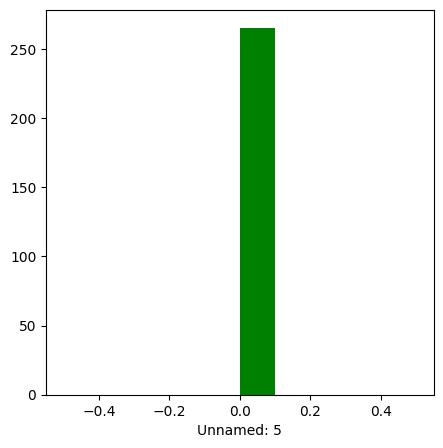

In [ ]:

df_filled = df.fillna(0)

for i in cols:
    fig = plt.figure(figsize=(5, 5))
    plt.hist(df_filled[i], color="green", bins=10)
    plt.xlabel(i)
    plt.show()


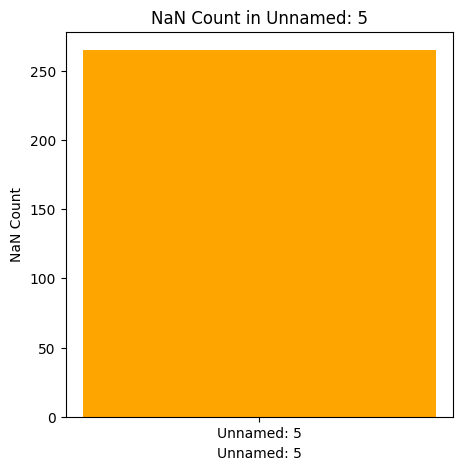

In [ ]:
import matplotlib.pyplot as plt

# Count the number of NaN values in the column
nan_count = df['Unnamed: 5'].isna().sum()

# Create a bar chart for the NaN count
fig = plt.figure(figsize=(5, 5))
plt.bar(['Unnamed: 5'], [nan_count], color="orange")
plt.xlabel('Unnamed: 5')
plt.ylabel('NaN Count')
plt.title('NaN Count in Unnamed: 5')
plt.show()


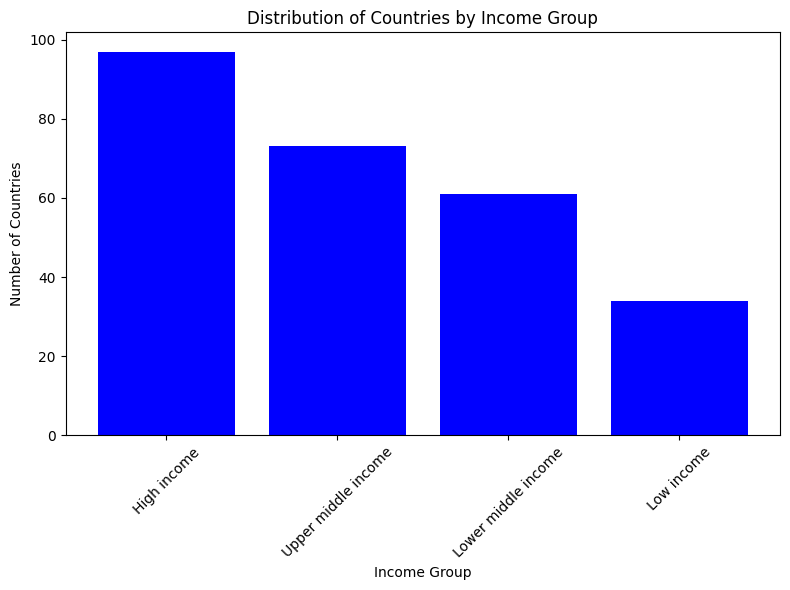

In [ ]:
df_clean = df.dropna(subset=['IncomeGroup'])

income_group_counts = df_clean['IncomeGroup'].value_counts()

fig = plt.figure(figsize=(8, 6))
plt.bar(income_group_counts.index, income_group_counts.values, color='blue')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-33-45f7d765a010>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IncomeGroup', y='Count', data=income_group_counts, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

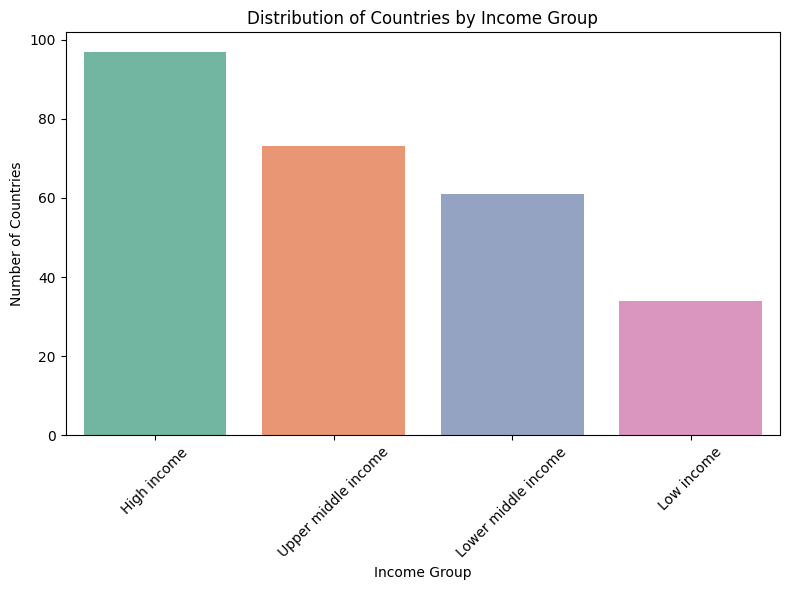

In [ ]:
import seaborn as sns
df_clean = df.dropna(subset=['IncomeGroup'])


income_group_counts = df_clean['IncomeGroup'].value_counts().reset_index()
income_group_counts.columns = ['IncomeGroup', 'Count']


plt.figure(figsize=(8, 6))
sns.barplot(x='IncomeGroup', y='Count', data=income_group_counts, palette='Set2')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-34-92715177d017>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IncomeGroup', y='Count', data=income_group_counts, palette='coolwarm', ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

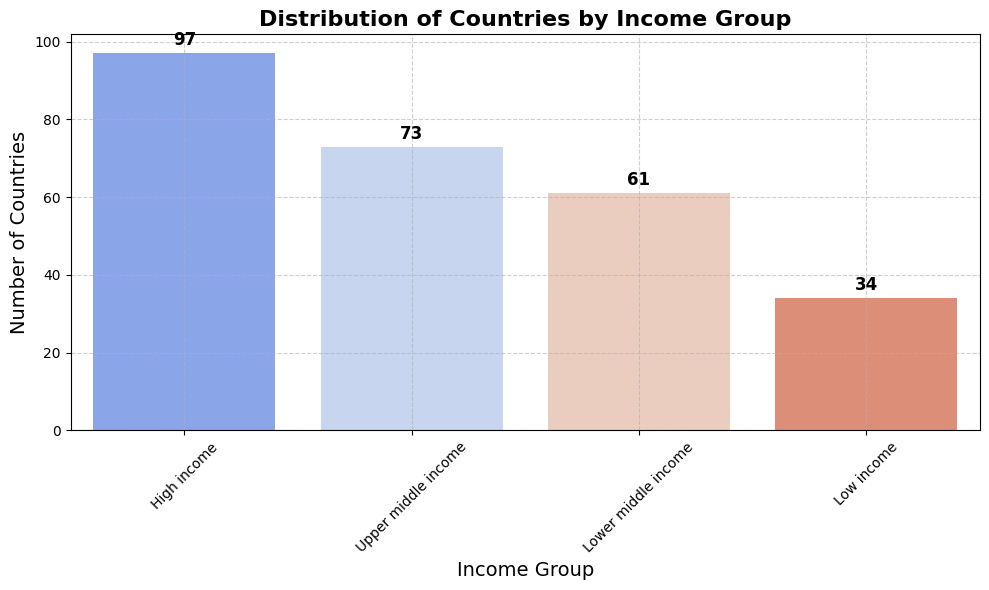

In [ ]:

df_clean = df.dropna(subset=['IncomeGroup'])

income_group_counts = df_clean['IncomeGroup'].value_counts().reset_index()
income_group_counts.columns = ['IncomeGroup', 'Count']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='IncomeGroup', y='Count', data=income_group_counts, palette='coolwarm', ax=ax)

for index, value in enumerate(income_group_counts['Count']):
    ax.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.title('Distribution of Countries by Income Group', fontsize=16, fontweight='bold')


plt.xticks(rotation=45)

plt.tight_layout()

plt.show()
